# 1. Importing required Libraries 

In [1]:
import os
import keras
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.applications import VGG19
from keras.layers import Dense, Flatten, Dropout
from keras.models import Model
from keras.optimizers import Adam

# 2. Splitting data to train(80%) and test(20%)
I loaded into memory as binary data and stored in a list of numpy arrays. Moreover, The corresponding class labels are stored in a separate list. The train_test_split function is then used to split the data into train and test datasets, along with their labels.  

In [2]:
# Loading the data into a numpy array
data_dir = 'C:/Users/farfar/Downloads/sign/sign/'

images = []
labels = []

for i in range(43):
    path = os.path.join(data_dir, str(i))
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        images.append(np.array(img_array))
        labels.append(i)

images = np.array(images)
labels = np.array(labels)

In [3]:
print(images.shape)
print(labels.shape)

(73139, 32, 32, 3)
(73139,)


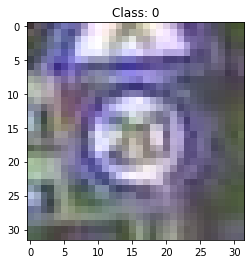

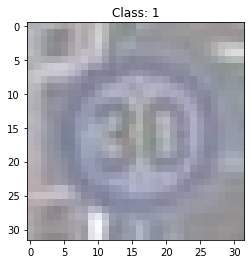

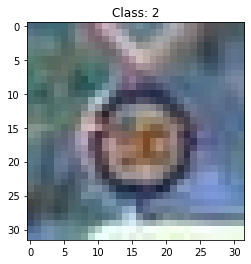

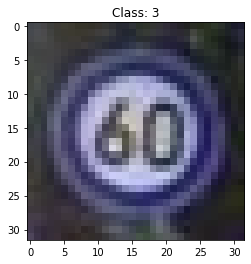

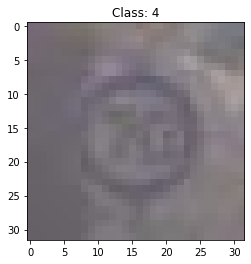

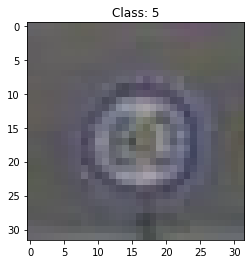

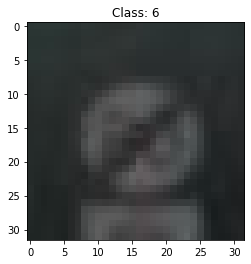

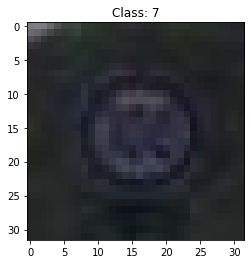

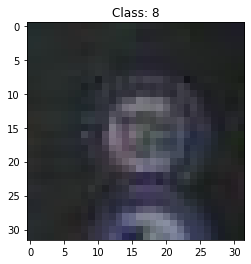

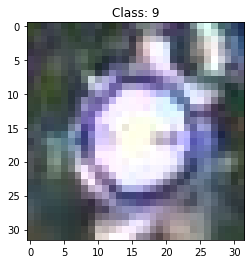

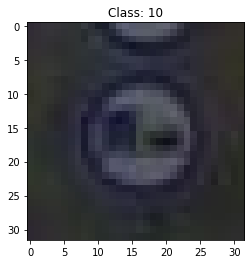

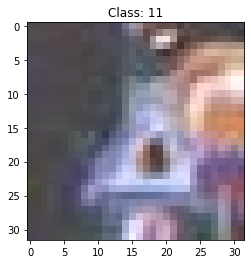

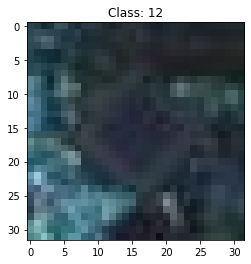

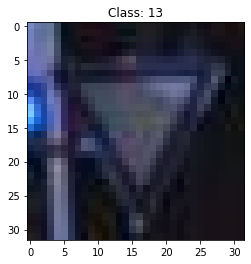

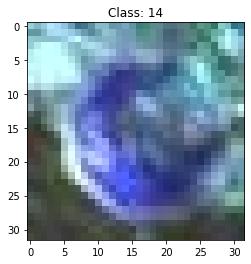

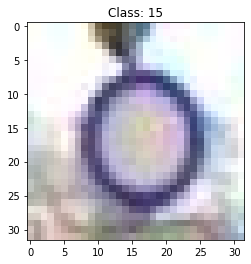

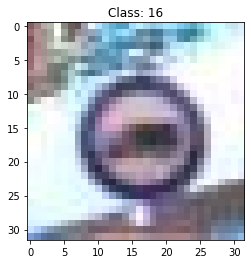

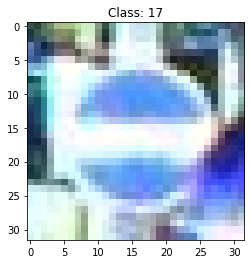

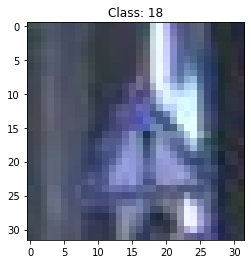

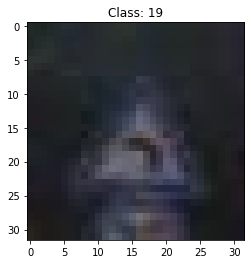

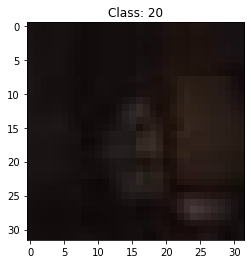

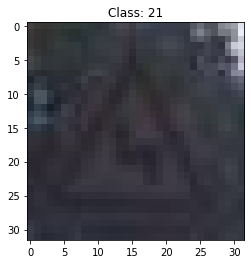

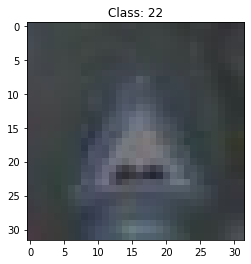

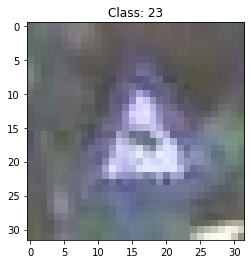

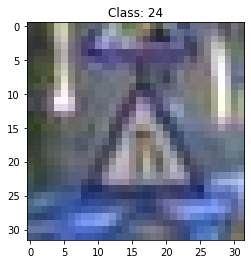

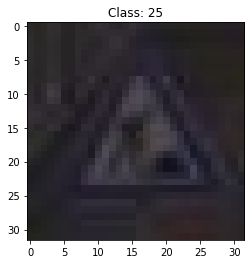

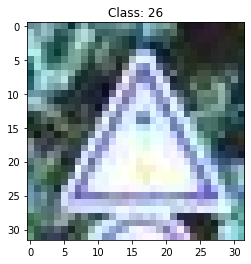

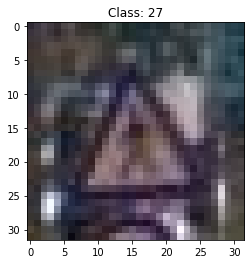

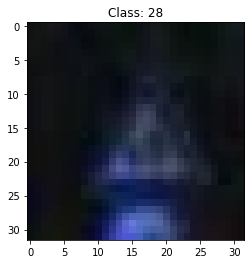

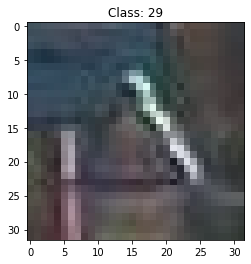

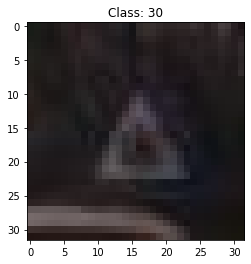

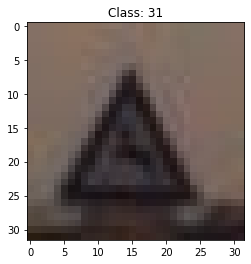

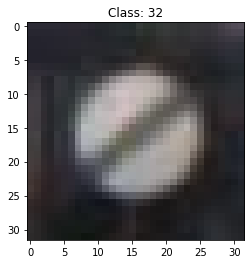

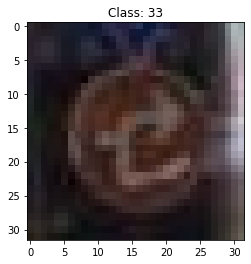

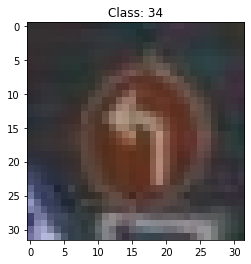

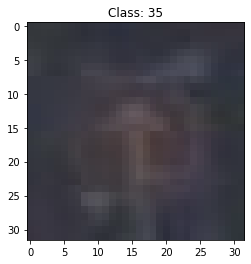

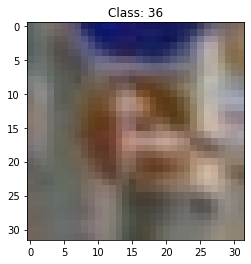

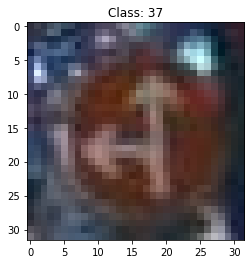

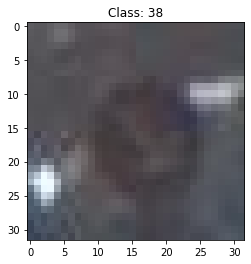

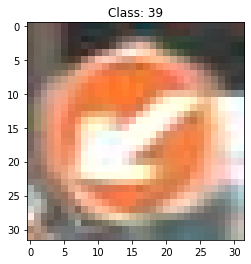

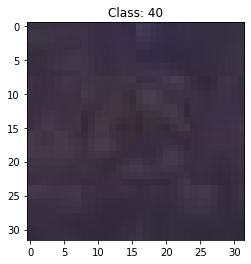

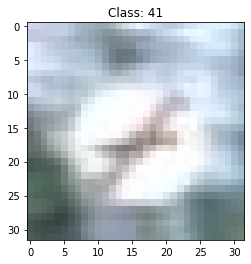

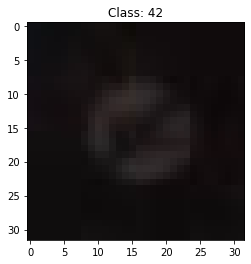

In [4]:
# displaying an example image for each class

unique_labels = np.unique(labels)

for label in unique_labels:
    idx = np.where(labels == label)
    plt.imshow(images[idx[0][0]])
    plt.title("Class: {}".format(label))
    plt.show()

In [5]:
# splitting the dataset into the train and test 
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

In [6]:
# In order to make sure that the code above work well, I printed the shape of following items:
print(labels)
print(images.shape)
print(labels.shape)
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

[ 0  0  0 ... 42 42 42]
(73139, 32, 32, 3)
(73139,)
(58511, 32, 32, 3)
(14628, 32, 32, 3)
(58511,)
(14628,)


### Converting the labels into one hot encoding ###

In [7]:
# Number of total classes
total_classes = 43

train_labels = keras.utils.to_categorical(train_labels, total_classes)
test_labels = keras.utils.to_categorical(test_labels, total_classes)

# The dimensions concur
print(train_labels.shape)
print(test_labels.shape)

(58511, 43)
(14628, 43)


# 3. Use the pre-trained VGG19 model on imageNet  as a <font color='red'>feature extraction</font> (first layer of our model) :
(a)	Add a Flatten and 2 Dense layers with 1024 and 512 nodes respectively. Add some Dropout layers in between Dense layers.

(b)	The convolutional base is frozen during training such that its weights are not updated.

(c) Compile the model with Adam optimizer and loss="categorical_crossentropy.

(d) Train the model on the training dataset  and evaluate dataset for validation for epochs =10.

In [8]:
# Load the VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(32,32,3))

In [9]:
# Freeze the convolutional base
for layer in base_model.layers:
    layer.trainable = False

In [10]:
# Add a Flatten layer to the base model
x = Flatten()(base_model.output)

# Add two Dense layers with 1024 and 512 nodes respectively, with Dropout layers in between
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

# Add the final output layer with softmax activation, for the number of classes
predictions = Dense(43, activation='softmax')(x)

# Compile the model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/10
1829/1829 [==============================] - 152s 83ms/step - loss: 2.8420 - accuracy: 0.2939 - val_loss: 1.7494 - val_accuracy: 0.4551
Epoch 2/10
1829/1829 [==============================] - 167s 91ms/step - loss: 1.9631 - accuracy: 0.4029 - val_loss: 1.5739 - val_accuracy: 0.4993
Epoch 3/10
1829/1829 [==============================] - 165s 90ms/step - loss: 1.8250 - accuracy: 0.4464 - val_loss: 1.4950 - val_accuracy: 0.5185
Epoch 4/10
1829/1829 [==============================] - 168s 92ms/step - loss: 1.7536 - accuracy: 0.4662 - val_loss: 1.4076 - val_accuracy: 0.5508
Epoch 5/10
1829/1829 [==============================] - 165s 90ms/step - loss: 1.6978 - accuracy: 0.4827 - val_loss: 1.3057 - val_accuracy: 0.5744
Epoch 6/10
1829/1829 [==============================] - 164s 90ms/step - loss: 1.6549 - accuracy: 0.4991 - val_loss: 1.2649 - val_accuracy: 0.5956
Epoch 7/10
1829/1829 [==============================] - 168s 92ms/step - loss: 1.6213 - accuracy: 0.5106 - val_loss: 1

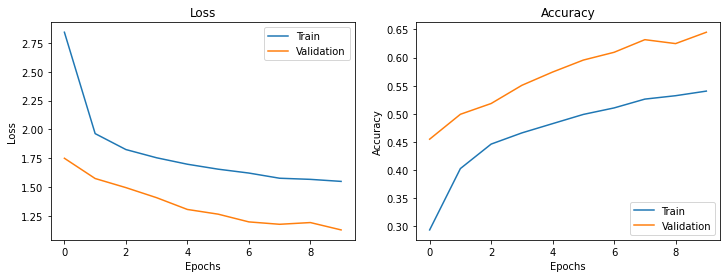

In [12]:
# Plot the training loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.show()

### I have noticed that validation accuracy and loss will usually be better than training accuracy and loss. This should be because the regularization is strong, which only suppresses training-time metrics.

1/1 [==============================] - 0s 165ms/step


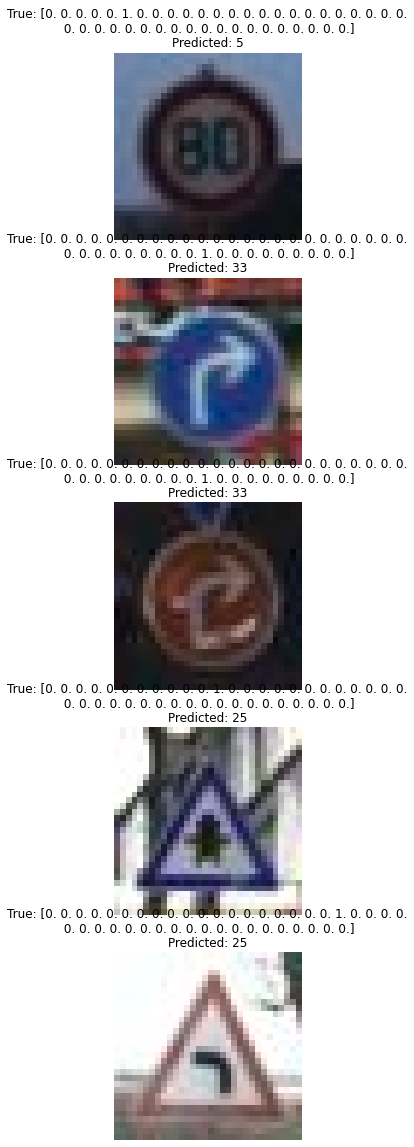

In [13]:
# Get 5 random indices from the test dataset
random_indices = random.sample(range(len(test_images)), 5)

# Get the images and labels corresponding to the random indices
random_test_images = test_images[random_indices]
random_test_labels = test_labels[random_indices]

#Make predictions on the random test images
predictions = model.predict(random_test_images)

#Convert the predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Plot the random test images with their true and predicted labels
fig, ax = plt.subplots(5, 1, figsize=(20, 20))
for i, (img, true_label, predicted_label) in enumerate(zip(random_test_images, random_test_labels, predicted_labels)):
    ax[i].imshow(img)
    ax[i].set_title("True: {}\nPredicted: {}".format(true_label, predicted_label))
    ax[i].axis('off')
plt.show()

# 4. Use the pre-trained VGG19 model on imageNet for <font color='red'>fine-tuning</font>  (5 points) :

(a) Unfreeze the top 3 layers (i.e. block5_conv2, block5_conv3 and block5_pool) and then stack our custom dense layer of top of it such as step1 (Add a Flatten and 2 Dense layers with 1024 and 512 nodes respectively. Add some Dropout layers in between dense layer.


In [44]:
# Load the VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(32,32,3))

In [45]:
# add new top layers for fine-tuning
# Add a Flatten layer to the base model
x = base_model.output
x = Flatten()(x)
# Add two Dense layers with 1024 and 512 nodes respectively, with Dropout layers in between
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
# Add the final output layer with softmax activation, for the number of classes
predictions = Dense(43, activation='softmax')(x)

# create the new model with modified top layers
model = Model(inputs=base_model.input, outputs=predictions)

In [46]:
for layer in base_model.layers[:-3]: #the last 3 layers of the model from being frozen
    layer.trainable = False

In [47]:
# compile the model with a low learning rate and categorical cross-entropy loss
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\farfar\Anaconda3\envs\geo_env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [48]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/10
1829/1829 [==============================] - 324s 177ms/step - loss: 3.3219 - accuracy: 0.1284 - val_loss: 2.8950 - val_accuracy: 0.1653
Epoch 2/10
1829/1829 [==============================] - 324s 177ms/step - loss: 2.8006 - accuracy: 0.1641 - val_loss: 2.6874 - val_accuracy: 0.1799
Epoch 3/10
1829/1829 [==============================] - 336s 184ms/step - loss: 2.5224 - accuracy: 0.2325 - val_loss: 2.0940 - val_accuracy: 0.3368
Epoch 4/10
1829/1829 [==============================] - 322s 176ms/step - loss: 1.7261 - accuracy: 0.4533 - val_loss: 1.3452 - val_accuracy: 0.5606
Epoch 5/10
1829/1829 [==============================] - 324s 177ms/step - loss: 1.2855 - accuracy: 0.5745 - val_loss: 1.0889 - val_accuracy: 0.6362
Epoch 6/10
1829/1829 [==============================] - 320s 175ms/step - loss: 1.0599 - accuracy: 0.6556 - val_loss: 0.9247 - val_accuracy: 0.7001
Epoch 7/10
1829/1829 [==============================] - 325s 178ms/step - loss: 0.8811 - accuracy: 0.7193 - val_

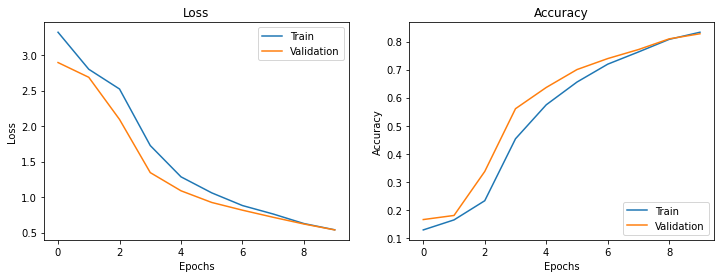

In [49]:
# Plot the training loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.show()

1/1 [==============================] - 0s 141ms/step


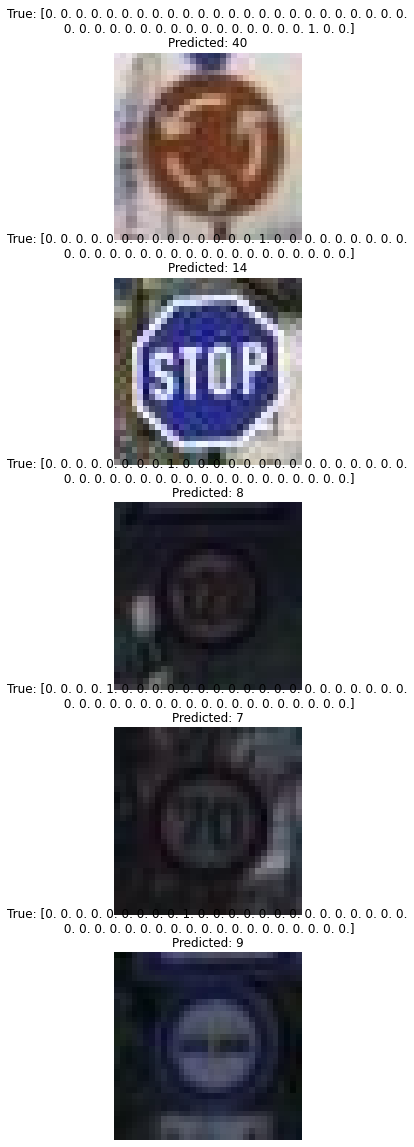

In [50]:
# Get 5 random indices from the test dataset
random_indices = random.sample(range(len(test_images)), 5)

# Get the images and labels corresponding to the random indices
random_test_images = test_images[random_indices]
random_test_labels = test_labels[random_indices]

#Make predictions on the random test images
predictions = model.predict(random_test_images)

#Convert the predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Plot the random test images with their true and predicted labels
fig, ax = plt.subplots(5, 1, figsize=(20, 20))
for i, (img, true_label, predicted_label) in enumerate(zip(random_test_images, random_test_labels, predicted_labels)):
    ax[i].imshow(img)
    ax[i].set_title("True: {}\nPredicted: {}".format(true_label, predicted_label))
    ax[i].axis('off')
plt.show()

# 5. Discussion and Conclusion
When the convolutional base is frozen during training, the weights of the base model are not updated during the training process. This means that the features learned by the pre-trained model are kept as they are, and only the custom dense layer on top of the base model is trained on the new data.

On the other hand, if the top 3 layers are unfrozen during training, the base model's weights will be updated during the training process, allowing the model to learn and adapt to the new data in a more fine-tuned way. By unfreezing the top 3 layers, the model has the opportunity to further optimize its feature learning process to better suit the new data, in addition to the training of the custom dense layer.

The experiment results show that unfreezing the top layers of a pre-trained model for fine-tuning can potentially lead to better performance and accuracy compared to freezing all layers, especially if the new dataset is significantly different from the original ImageNet like this case. Furthemore, This can be helpful if the new dataset is similar to the original dataset and the learned representations are still relevant. In the terms of time, I have to mention that freezing all layers takes less time for the training pocess than unfreezing the convolutional layers.